# What are the programming languages and technologies that highest paid software developers are using ?


### Business Understanding

If you are a seasoned software developer or a newbee who just want to be a software developer, you may want to know answers to the questions like: 
What are the programming languages and technologies that highest paid software developers are using ?
What are the database technologies, web fraemworks, and other tools and libreries that highest paid software developers are using ?

To answer these questions, I used data from Stackoverflow's 2019 Annual Developer Survey. The survey data covers 88,863 reviews from 213 countries and territories.

### Data Understanding

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt

df = pd.read_csv('./survey_results_public_2019.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


Let's focus on our first question: 
What are the programming languages and technologies that highest paid software developers are using ?
To answer this question we will review the field 
LanguageWorkedWith in the dataframe. Let's look into the column more closely.

In [3]:
df.LanguageWorkedWith.value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                        1483
C#;HTML/CSS;JavaScript;SQL                                                                         1414
HTML/CSS;JavaScript                                                                                1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                               990
Java                                                                                                934
HTML/CSS;JavaScript;PHP                                                                             910
Python                                                                                              759
HTML/CSS;JavaScript;TypeScript                                                                      703
HTML/CSS;Java;JavaScript;SQL                                                                        671
C#                                                              

In [4]:
# This isn't what I was expecting, it is grouping programming languages together 
# So one row has more than just one answer.  I write a function to clean it up. 
# Following function will create a dictionary with all programming languages and counts. 
# We can use the dictionary to get TOP languages and also do some data visualizations. 

def create_dict_from_col(schema, column):
    '''
    INPUT 
        schema - a dataframe schema name
        column - column name with ';' seperator     
    OUTPUT
        desired_lang_dict - a dictionary with list of category names and their counts
    '''
    df_new = schema[schema[column].notnull()] # Remove NaN records
    desired_lang_dict = {} # Initialize the dict
    # Populate the dict
    for row in df_new[column].to_list():
        languages = row.split(';')
        for each_lang in languages:
            if each_lang in desired_lang_dict:
                desired_lang_dict[each_lang] += 1
            else:
                desired_lang_dict[each_lang] = 1
    return desired_lang_dict

In [5]:
# This utility function will create a bar plot from the dictionary obtained 
def plot_bar_on_df(df, x_col, y_col, title, ip_palette="Rocket"):
    '''
    INPUT 
        df - a data frame
        x_col - Name of the X axis - category name
        y_col - Name of the Y axis - stores count
        title - title of the bar chart
    OUTPUT
        bar chart
    '''
    df_lang = df.sort_values(by=y_col, ascending=False)
    sns.set(style="white", context="talk")
    sns.set(rc={'figure.figsize':(12.1,8.5)})
    tips = sns.load_dataset("tips")
    ax = sns.barplot(x=x_col, y = y_col, data=df_lang, palette=ip_palette)
    ax.axhline(0, color="k", clip_on=False)
    ax.set(xlabel=x_col, ylabel=y_col)
    ax.set_title(title,fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light')

In [6]:
# Using above functions we can easily get a list of all languages worked by the survey responders.
lang_list = create_dict_from_col(df,'LanguageWorkedWith').keys()  
lang_list    

dict_keys(['HTML/CSS', 'Java', 'JavaScript', 'Python', 'C++', 'C', 'C#', 'SQL', 'VBA', 'R', 'Bash/Shell/PowerShell', 'Ruby', 'Rust', 'TypeScript', 'WebAssembly', 'Other(s):', 'Go', 'PHP', 'Assembly', 'Kotlin', 'Swift', 'Objective-C', 'Elixir', 'Erlang', 'Clojure', 'F#', 'Scala', 'Dart'])

In [7]:
# Let's write a function to give us average salaries of developers using those languages. 
# I've written the following generic fucntion

def get_mean_by_column_values(df,col_list,col_name,mean_col_name):
    '''
    INPUT 
        schema - a dataframe schema name
        col_list - a Python list with all category values
        col_name - category column name
        mean_col_name - column that we apply the average (should be int ot float)
    OUTPUT
        df_means - a sorted data farme with each category name and mean of the column supplied in mean_col_name column 
    '''
    # drop any row with null values in mean_col_name    
    df_notnull = df.dropna(subset=[mean_col_name,col_name], how='any')
    df_final = df_notnull[[mean_col_name,col_name]].reset_index(drop=True)
    
    df_subset = defaultdict(float)
    denoms = dict()
    for val in col_list:
        denoms[val] = 0
        for row_num in range(df_final.shape[0]):
            if val in df_final[col_name][row_num]:
                df_subset[val] += df_final[mean_col_name][row_num]
                denoms[val] += 1
    
    df_subset = pd.DataFrame(pd.Series(df_subset)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()  
    df_subset.columns = [mean_col_name, 'col_sum']
    denoms.columns = [mean_col_name, 'col_total']
    
    df_subset.columns = [col_name, 'col_sum']
    denoms.columns = [col_name, 'col_total']
    df_means = pd.merge(df_subset, denoms)
    df_means['mean_col'] = df_means['col_sum']/df_means['col_total']
    
    return df_means.sort_values('mean_col', ascending=False)

####  1. What are the programming languages that highest paid software developers are using ?

Let's get answer to the above question using the function we have just written.

In [9]:
lang_avg_sal = get_mean_by_column_values(df,lang_list,'LanguageWorkedWith','ConvertedComp')
lang_avg_sal = lang_avg_sal.rename(columns={"mean_col": "Average_Salary", "col_total": "Count"})
lang_avg_sal[['LanguageWorkedWith','Average_Salary']] 

,LanguageWorkedWith,Average_Salary
24,Clojure,200388.463499
25,F#,199244.413580
14,WebAssembly,174048.903780
16,Go,166309.421540
22,Elixir,163745.023385
23,Erlang,162096.112621
11,Ruby,159847.664729
26,Scala,159541.765203
12,Rust,158213.893074
9,R,155110.107874


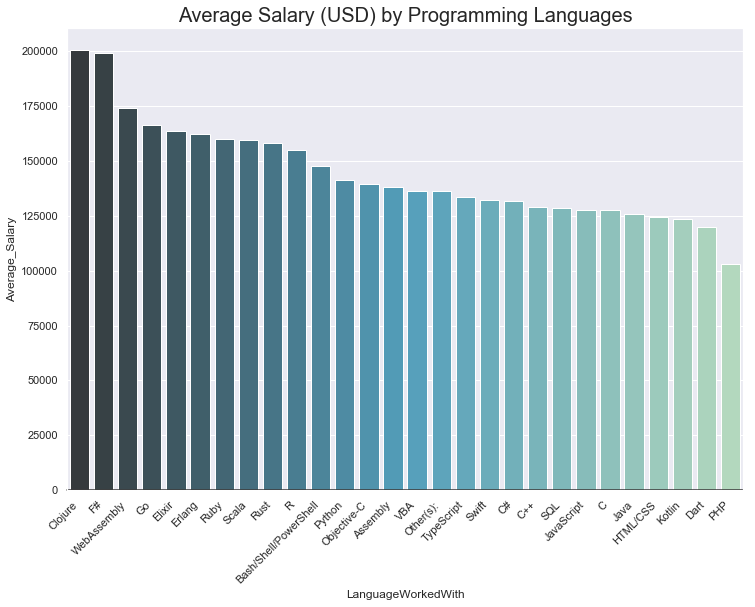

In [10]:
plot_bar_on_df(lang_avg_sal, 'LanguageWorkedWith', 
               'Average_Salary', "Average Salary (USD) by Programming Languages","GnBu_d")

### 2. What are the database environment that highest paid software developers are using ?

We can reuse our function to get this answered.

In [41]:
# Using above functions we can easily get a list of all languages worked by the survey responders.
db_list = create_dict_from_col(df,'DatabaseWorkedWith').keys()
db_avg_sal = get_mean_by_column_values(df,db_list,'DatabaseWorkedWith','ConvertedComp')
db_avg_sal = db_avg_sal.rename(columns={"mean_col": "Average_Salary", "col_total": "Count"})
db_avg_sal

,DatabaseWorkedWith,col_sum,col_total,mean_col
9,DynamoDB,6.140925e+08,3505,175204.696719
6,Cassandra,2.942433e+08,1801,163377.746252
3,Couchbase,1.614339e+08,1068,151155.299625
7,Elasticsearch,1.200737e+09,8173,146915.063257
13,Other(s):,5.222072e+08,3637,143581.845752
8,Redis,1.513739e+09,10608,142697.836538
1,PostgreSQL,2.407099e+09,18207,132207.313121
10,Microsoft SQL Server,2.263035e+09,17151,131947.697335
0,SQLite,1.780116e+09,14760,120604.080759
4,MongoDB,1.529513e+09,12684,120585.998029


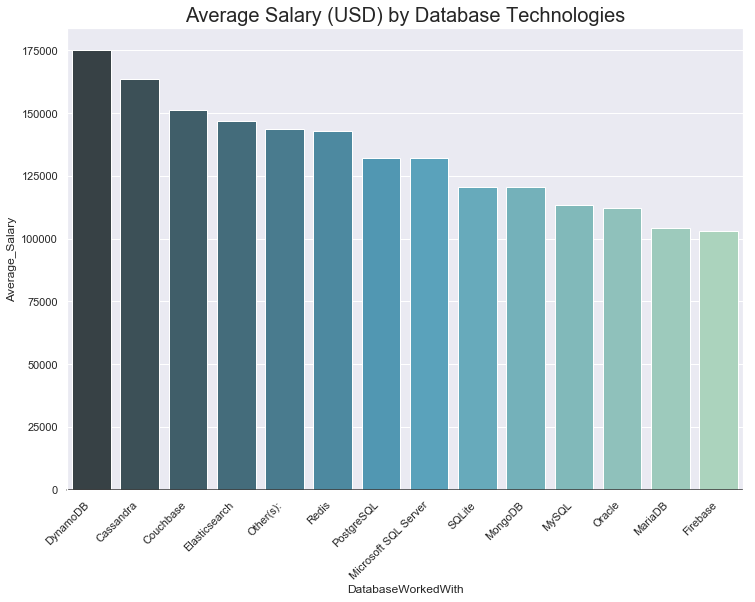

In [42]:
plot_bar_on_df(db_avg_sal, 'DatabaseWorkedWith', 
               'Average_Salary', "Average Salary (USD) by Database Technologies","GnBu_d")

### 3. What are the web frameworks that highest paid software developers are using ?

We can reuse our function to get this answered.

In [47]:
web_list = create_dict_from_col(df,'WebFrameWorkedWith').keys()
web_avg_sal = get_mean_by_column_values(df,web_list,'WebFrameWorkedWith','ConvertedComp')
web_avg_sal = web_avg_sal.rename(columns={"mean_col": "Average_Salary", "col_total": "Count"})
web_avg_sal

,WebFrameWorkedWith,col_sum,Count,Average_Salary
6,Ruby on Rails,5.374404e+08,3657,146962.108012
1,Flask,7.232106e+08,4991,144902.935484
4,React.js,1.943715e+09,14111,137744.689816
2,Express,1.103571e+09,8321,132624.849177
9,ASP.NET,1.535225e+09,11710,131103.743467
7,Other(s):,4.916429e+08,3764,130617.145058
8,Angular/Angular.js,1.716019e+09,13830,124079.433406
5,Spring,8.817292e+08,7189,122649.776464
10,Vue.js,7.969622e+08,6696,119020.639188
0,Django,6.035315e+08,5123,117808.218622


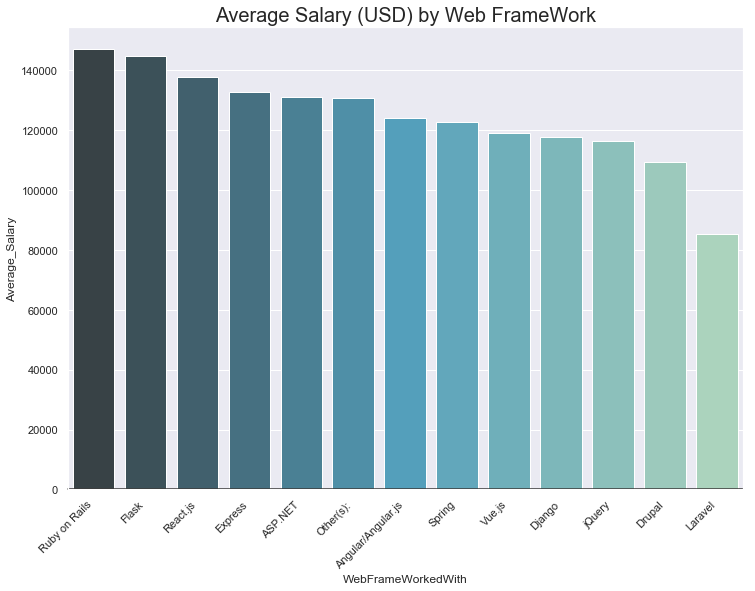

In [49]:
plot_bar_on_df(web_avg_sal, 'WebFrameWorkedWith', 
               'Average_Salary', "Average Salary (USD) by Web FrameWork","GnBu_d")

### 4. What are the tools/libraries/miscelleneous frameworks that highest paid software developers are using ?

We can reuse our function to get this answered.

In [11]:
tech_list = create_dict_from_col(df,'MiscTechWorkedWith').keys()
tech_avg_sal = get_mean_by_column_values(df,tech_list,'MiscTechWorkedWith','ConvertedComp')
tech_avg_sal = tech_avg_sal.rename(columns={"mean_col": "Average_Salary", "col_total": "Count"})
tech_avg_sal[['MiscTechWorkedWith','Average_Salary']]

,MiscTechWorkedWith,Average_Salary
8,Chef,186887.438369
13,Puppet,179073.158355
15,Apache Spark,176494.489723
3,Hadoop,165777.458513
7,Ansible,154482.607589
4,Pandas,152777.191769
11,.NET Core,142331.468176
9,TensorFlow,141974.027936
14,Other(s):,139971.361610
6,Torch/PyTorch,139646.021140


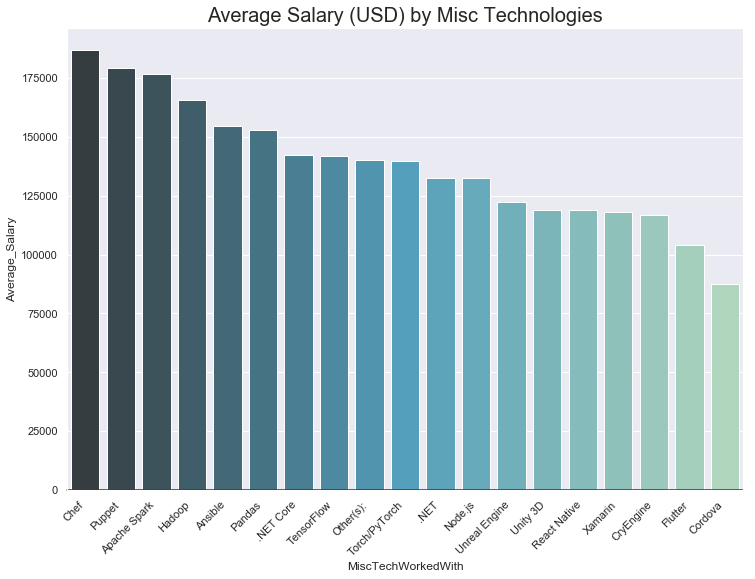

In [54]:
plot_bar_on_df(tech_avg_sal, 'MiscTechWorkedWith', 
               'Average_Salary', "Average Salary (USD) by Misc Technologies","GnBu_d")